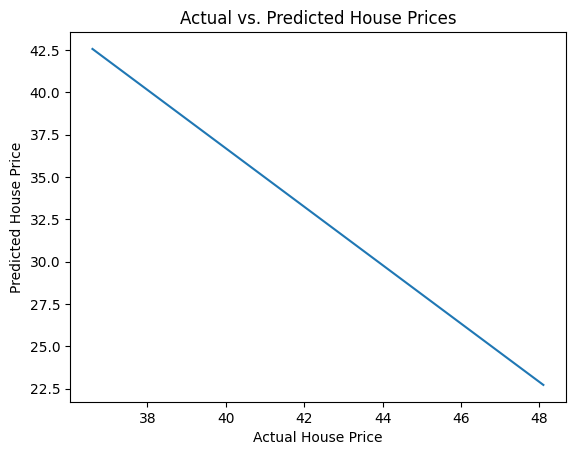

R^2 :  -9.272558154537984
MAE : 15.663673809252941
RMSE: 18.42922825254525


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Multi Linear regression

df = pd.read_csv("Real_estate.csv")


X = df.loc[:, ["X1 transaction date","X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores","X5 latitude","X6 longitude"]].values
Y = df.loc[:, ["Y house price of unit area"]].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

reg = LinearRegression()
reg.fit(X_train, Y_train)

Y_pred = reg.predict(X_test)

combined_data = pd.DataFrame({
    "Actual": Y_test[:15,:].flatten(),
    "Predicted": Y_pred[:15,:].flatten()
})


# Plot actual vs. predicted data
sns.lineplot(data=combined_data, x="Actual", y="Predicted")
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs. Predicted House Prices")
plt.show()

print("R^2 : ", r2_score(Y_test, Y_pred))
print("MAE :", mean_absolute_error(Y_test, Y_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred)))

<ipython-input-9-32b16db3c40e>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label=f'Normal Fit: $\mu={mu:.2f}$, $\sigma={std:.2f}$',color="b")


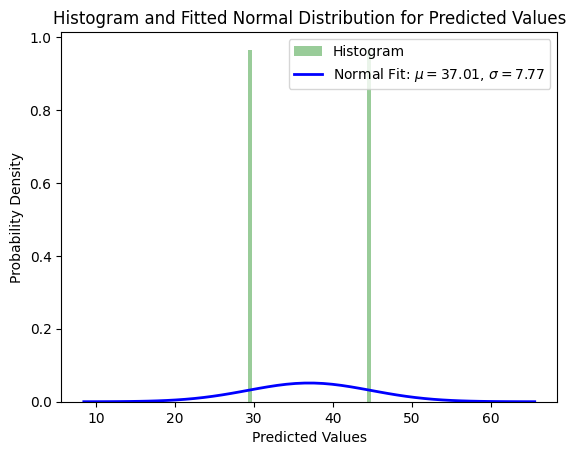

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot histogram of predicted values
plt.hist(Y_pred, bins=30, density=True, alpha=0.4, color='g', label='Histogram')

# Fit a normal distribution to the data
mu, std = norm.fit(Y_pred)

xmin, xmax = plt.xlim()
x = np.linspace(xmin-20, xmax+20)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Normal Fit: $\mu={mu:.2f}$, $\sigma={std:.2f}$',color="b")

# Add labels, legend, and title
plt.xlabel('Predicted Values')
plt.ylabel('Probability Density')
plt.title('Histogram and Fitted Normal Distribution for Predicted Values')
plt.legend()


# Show plot
plt.show()